**Desafio 1: O perfil do Catálogo da Netflix**

Esse desafio tem como objetivo responder algumas perguntas através da
análise de dados, aprofundando o conhecimento em frequência e medidas.
Os dados que deverão ser utilizado nesse script foram baixados do kaggle,
e podem ser acessados através do link:
https://www.kaggle.com/code/shivamb/netflix-shows-and-movies-exploratory-analysis

Este conjunto de dados consiste na lista de filmes e suas respectivas e
suas informações.

Variáveis:

● show_id - id único do filme/série.

● title - título do filme ou série

● director - diretor do filme ou série

● cast - elenco do filme ou série

● country - país do filme ou série

● date_added - data que foi adicionado no Netflix

● reading score - ano de lançamento original do filme

● rating - classificação da televisão

● duration - duração total do filme ou série.

● listed_in - categoria ou gênero do filme ou série.

● description -descrição do filme ou série.

● type - tipo de filme ou série

Os dados são arquivos em .csv.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from google.colab import files
netflix = pd.read_csv('netflix_titles_nov_2019.csv.zip')
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


1. Exploração inicial:

○ Quantas linhas e colunas tem o dataset?

In [ ]:
#Função para demonstrar o número de linhas e colunas
def obter_dimensoes(netflix):
    linhas, colunas = netflix.shape
    return f"O dataset contém {linhas} linhas e {colunas} colunas."
    print("\nFunção personalizada para dimensões do dataset:")
print(obter_dimensoes(netflix))

O dataset contém 5837 linhas e 12 colunas.


○ Quais são os tipos das variáveis e se há valores ausentes?

In [ ]:
#Tipo das variáveis e informações
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [ ]:
print("\nTipo de dados retornado pela função 'data':", type(netflix))


Tipo de dados retornado pela função 'data': <class 'pandas.core.frame.DataFrame'>


In [ ]:
#Retorna o número de valores ausentes em cada coluna.
print(netflix.isnull().sum())

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


**2. Análises de frequência:**

○ Qual a proporção de filmes vs. séries no catálogo?

In [ ]:
# Contar a proporção dos valores na coluna 'Type'
contagem_tipo = netflix['type'].value_counts(normalize=True)

# Exibir o resultado
print("Proporção de filmes vs. séries no catálogo:")
print(contagem_tipo)

Proporção de filmes vs. séries no catálogo:
type
Movie      0.674833
TV Show    0.325167
Name: proportion, dtype: float64


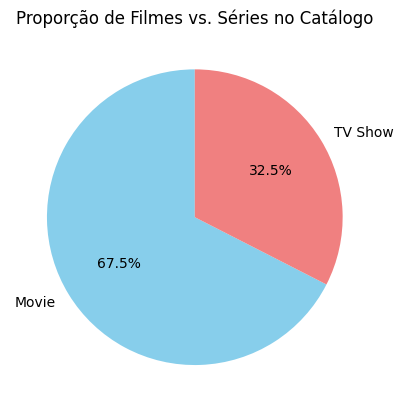

In [ ]:
netflix['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.ylabel('')
plt.title('Proporção de Filmes vs. Séries no Catálogo')
plt.show()

○ Qual o gênero mais frequente?

In [ ]:
netflix_explodido = netflix.assign(listed_in=netflix['listed_in'].str.split(', ')).explode('listed_in')
netflix_explodido.value_counts('listed_in')

,count
listed_in,
International Movies,1797
Dramas,1488
Comedies,992
International TV Shows,966
Documentaries,658
TV Dramas,574
Action & Adventure,532
Independent Movies,516
TV Comedies,425


In [ ]:
genero_frequente = netflix_explodido['listed_in'].value_counts().idxmax()

print("Gênero mais frequente:", genero_frequente)

Gênero mais frequente: International Movies


**3. Análises estatísticas:**

○ Qual a média, mediana e moda do tempo de duração dos
filmes?

In [ ]:
netflix["temporada"] = netflix["duration"].str.extract(r"(\d+)\s*Season[s]?")
netflix.loc[netflix["temporada"].notna(), "duration"] = ""

colunas_ordenadas = ["title", "director", "cast", "country", "date_added", "release_year", "rating",
    "duration", "temporada", "listed_in", "description", "type"]

netflix = netflix[colunas_ordenadas]
netflix[colunas_ordenadas].head()

,title,director,cast,country,date_added,release_year,rating,duration,temporada,listed_in,description,type
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,,1,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,NaN,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,NaN,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,NaN,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,,2,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [ ]:
netflix['duration'] = netflix['duration'].str.replace(' min', '', regex=False)
netflix['duration'] = pd.to_numeric(netflix['duration'], errors='coerce')

media = netflix['duration'].mean()
mediana = netflix['duration'].median()
moda = netflix['duration'].mode()

print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')

Média: 98.02919522721503
Mediana: 97.0
Moda: 0    90.0
Name: duration, dtype: float64


○ Qual o filme mais curto e mais longo?

In [ ]:
menor_duracao = netflix.loc[netflix['duration'].idxmin(), ['title', 'duration']]
maior_duracao = netflix.loc[netflix['duration'].idxmax(), ['title', 'duration']]

print("Filme com menor duração:", menor_duracao['title'], "-", menor_duracao['duration'], "min")
print("Filme com maior duração:", maior_duracao['title'], "-", maior_duracao['duration'], "min")

Filme com menor duração: Silent - 3.0 min
Filme com maior duração: Black Mirror: Bandersnatch - 312.0 min


4. Visualização de dados:

○ Criar um gráfico de barras para mostrar a quantidade de títulos
por gênero.

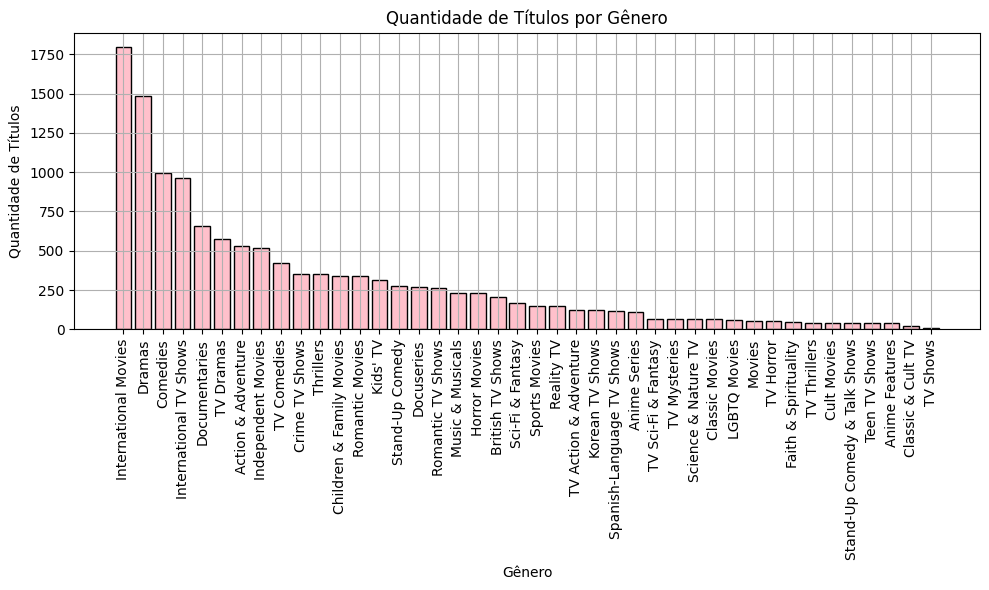

In [ ]:
# Obter os dados de gênero e contagem
generos = netflix_explodido['listed_in'].value_counts().index
contagem = netflix_explodido['listed_in'].value_counts().values

# Confirgurar o tamanho da figura, 10 polegadas de largura, 6 polegadas de altura
plt.rcParams['figure.figsize'] = (10, 6)

# Criar o gráfico de barras com plt.bar() adicionando as cores.
plt.bar(generos, contagem, color='pink', edgecolor='black')

# Adicionar rótulos, títulos, grade, rotação
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Títulos")
plt.title("Quantidade de Títulos por Gênero")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

○ Criar um histograma para analisar a distribuição da duração dos filmes.

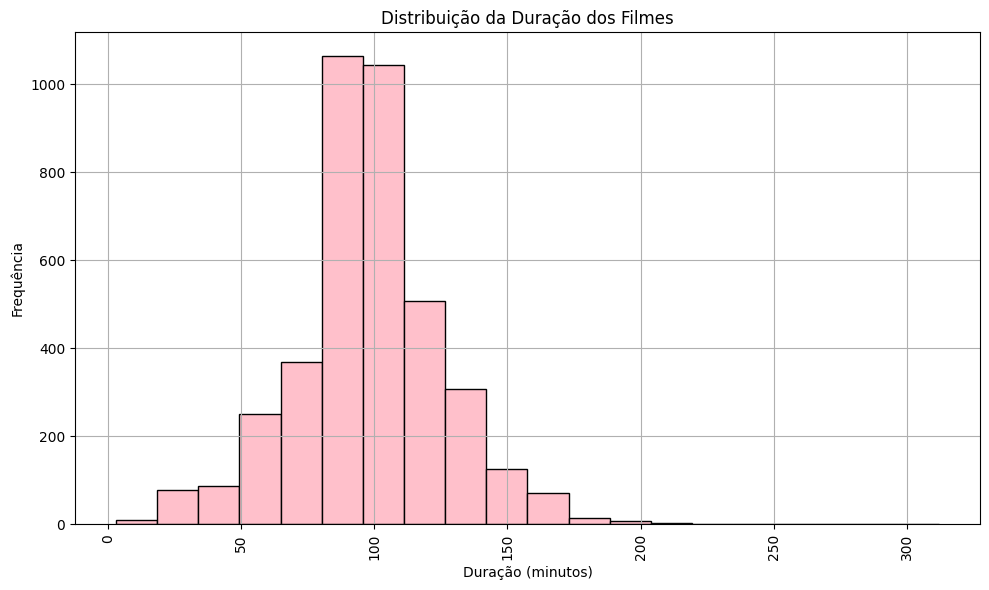

In [ ]:
# Obter os dados de duração e frequencia -  são informação que podem ser otimizadas.
duracao = netflix['duration'].value_counts().index
frequencia = netflix['duration'].value_counts().values

# Confirgurar o tamanho da figura, 10 polegadas de largura, 6 polegadas de altura
plt.rcParams['figure.figsize'] = (10, 6)

# Criar o histograma com plt.his() adicionando as cores.
plt.hist(netflix['duration'], bins=20, color='pink', edgecolor='black')

# Adicionar rótulos, títulos, grade, rotação
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.title('Distribuição da Duração dos Filmes')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

**Atividade extra:**

● Quais são os 5 países que possuem mais produções no catálogo?

In [ ]:
# Separar os países (algumas produções têm múltiplos países listados)
paises = netflix['country'].dropna().str.split(', ').explode()

# Contar a quantidade de produções por país
paises_contagem = paises.value_counts()

# Exibir os 5 países com mais produções
top_5_paises = paises_contagem.head(5)
print(top_5_paises)

country
United States     2420
India              753
United Kingdom     558
Canada             300
France             255
Name: count, dtype: int64


<ipython-input-19-3432d5566b9f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_paises.index, y=top_5_paises.values, palette="Blues_r")


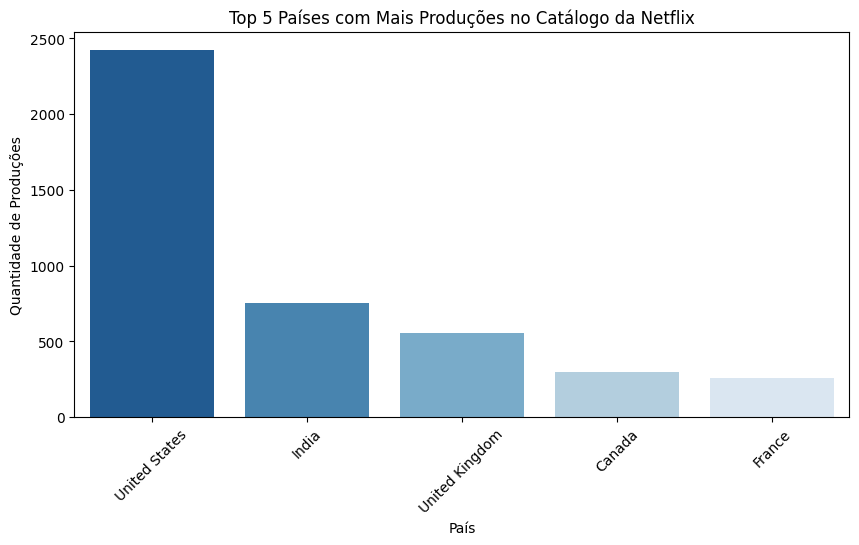

In [ ]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_paises.index, y=top_5_paises.values, palette="Blues_r")

plt.xlabel("País")
plt.ylabel("Quantidade de Produções")
plt.title("Top 5 Países com Mais Produções no Catálogo da Netflix")
plt.xticks(rotation=45)
plt.show()